In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

import numpy as np

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.datasets.pbmc3k()
sc.pp.filter_genes(adata, min_cells=5)
sc.pp.calculate_qc_metrics(adata, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
means = np.array(np.mean(adata.X, axis=0))[0]
sigma = np.std(adata.X.toarray(), axis=0)

In [4]:
CV = sigma / means

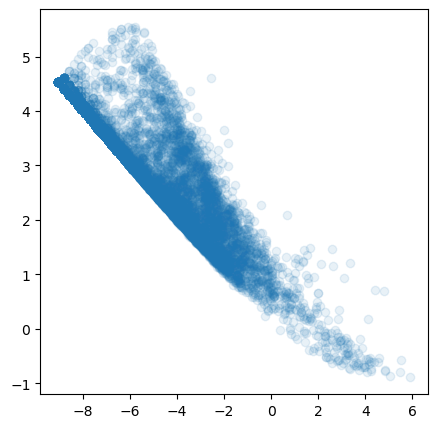

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(np.log2(means), np.log2(CV), alpha=0.1)

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.normalize_total(adata)

In [7]:
sc.pp.highly_variable_genes(adata)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [8]:
sc.tl.pca(adata, n_comps=100, svd_solver="arpack", use_highly_variable=True)

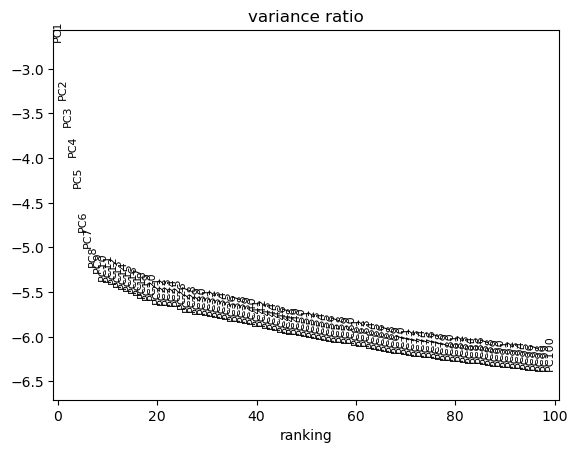

In [9]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

In [10]:
sc.pp.neighbors(adata, n_pcs=10, metric="cityblock")
sc.tl.umap(adata)

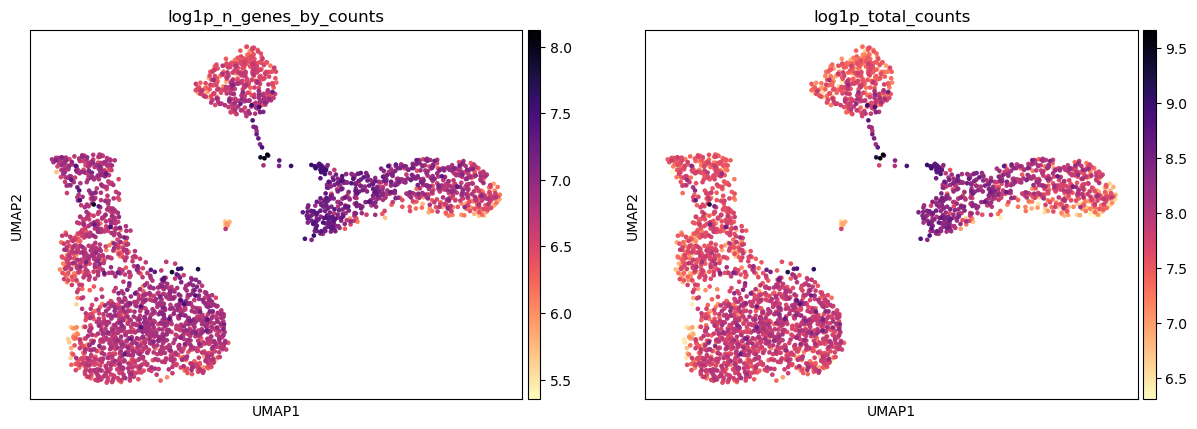

In [11]:
sc.pl.umap(adata, color=["log1p_n_genes_by_counts", "log1p_total_counts"], cmap="magma_r")